## MISSING VALUES

In [1]:
import seaborn as sns
import pandas as pd

In [30]:
df = sns.load_dataset('titanic')
# df.head()

In [31]:
# To check null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.shape

(891, 15)

In [ ]:
# we can drop these null values using dropna() method but it will remove the entire row which is not a good idea
# Or we can drop the column which has a huge number of null values-df.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)
# Both of these methods are not good for our analysis

# Imputation is a better way to handle null values. We can fill the null values with the mean, median, or mode of the column


# 1-Mean value imputauion

In [32]:
# sns.displot(data=df, x= 'age', kde = True)
# sns.histplot(df['age'], kde=True)

<Axes: xlabel='age mean', ylabel='Count'>

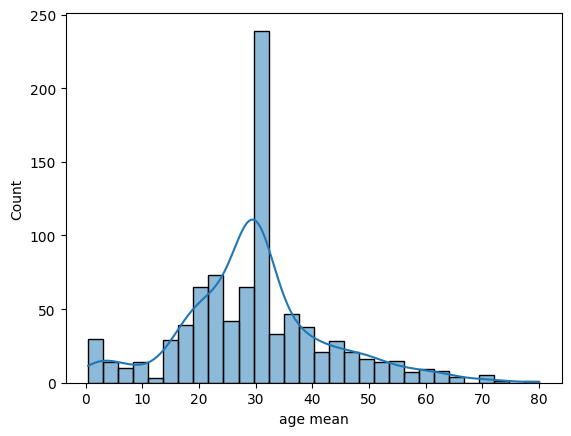

In [36]:
# To fill 'age' missing values with its mean value
df['age mean'] = df['age'].fillna(df['age'].mean())
sns.histplot(df['age mean'], kde=True)


In [37]:
# df.isnull().sum()
# df.head(10)

mean imputation works well when we have normally distributed data

## 2- Median imputation

better with right skewed or left skewed data or data having outliers

In [39]:
df['Age_median'] = df['age'].fillna(df['age'].median())
df[['age','age mean', 'Age_median']]

,age,age mean,Age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


## 3- Mode imputation
 good for categorical data

<Axes: xlabel='embarked', ylabel='count'>

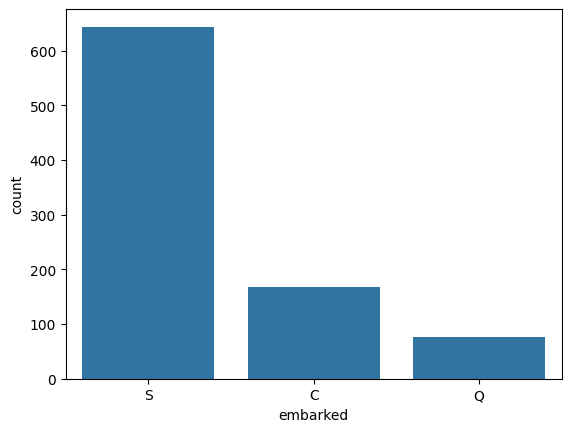

In [41]:
df['embarked'].unique() # To check unique values in embarked column
sns.countplot(data=df, x='embarked')

In [ ]:
# mode_value = df['embarked'].mode()[0] # using [0] to get the first value of mode
# df['embarked_mode'] = df['embarked'].fillna(mode_value)
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0] # here we are using notna() to get the mode of non-null values
df['embarked_mode'] = df['embarked'].fillna(mode_value)


In [48]:
df[['embarked', 'embarked_mode']].isnull().sum()

embarked         2
embarked_mode    0
dtype: int64

## How to configure imbalanced datasets

In [49]:
import numpy as np
import pandas as pd

In [50]:
np.random.seed(10)

# Create a DataFrame with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [51]:
n_class_0,n_class_1

(900, 100)

In [52]:
# Create my dataframe with imbalanced dataset with binary target (0 and 1)
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target' : [0]*n_class_0
    })

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target' : [1]*n_class_1
    })

In [60]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

## 1- Upsampling

In [61]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]
# So in upsampling we will increase the number of minority class samples to match the majority class samples

In [62]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, # sample with replacement
                                n_samples=len(df_majority), # to match majority class
                                random_state=23 # for reproducible results
                                )

In [ ]:
df_minority_upsampled.count() # Shows that the minority class has been upsampled to match the majority class

feature_1    900
feature_2    900
target       900
dtype: int64

In [65]:
df_resampled = pd.concat([df_majority, df_minority_upsampled])

In [68]:
df_resampled['target'].shape

(1800,)

## 2-Downsampling

In [69]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]
# So in downsampling we will decrease the number of majority class samples to match the minority class samples

In [72]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, # sample without replacement
                                    # to avoid removing all samples from majority class
                                  n_samples=len(df_minority),
                                  random_state=42 
                                   )


In [ ]:
df_resampled = pd.concat([df_minority, df_majority_downsampled])
df_resampled['target'].shape
df_resampled.target.value_counts()
# Down sampling reduces the number of datapoints which might lead to loss of information
# Upsampling increases the number of datapoints which might lead to overfitting
# So we can use SMOTE to create synthetic samples of the minority class
# SMOTE is Synthetic Minority Over-sampling Technique
# SMOTE is a technique that generates synthetic samples for the minority class by interpolating between existing samples
# It helps to balance the dataset without losing information from the majority class

target
1    100
0    100
Name: count, dtype: int64

## Using SMOTE for creating synthetic samples of minority class

In [82]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1,n_redundant=0, weights=[0.90, 0.10], random_state=23)

In [83]:
import pandas as pd
df1 = pd.DataFrame(x, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_pd = pd.concat([df1,df2], axis=1)

In [86]:
final_pd.target.value_counts()

target
0    898
1    102
Name: count, dtype: int64

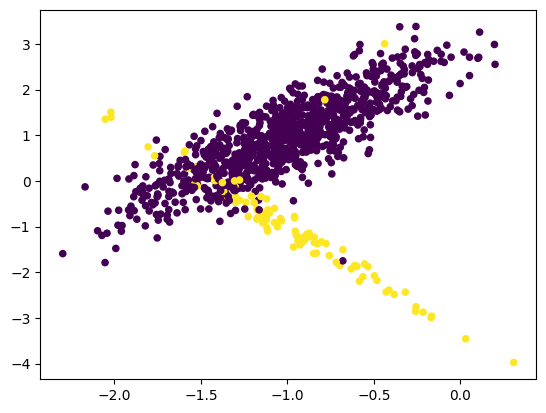

In [90]:
import matplotlib.pyplot as plt
plt.scatter(final_pd['f1'], final_pd['f2'], c=final_pd['target'] ,cmap='viridis' , s=20)

In [93]:
from imblearn.over_sampling import SMOTE
# Transform the dataset using SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(final_pd[['f1', 'f2']], final_pd['target'])
x.shape, y.shape

((1796, 2), (1796,))

In [95]:
y[y==1].shape[0] # to check the number of samples in minority class after SMOTE
# y[y==0].shape[0] # to check the number of samples in majority class after SMOTE

898

In [96]:
df1 = pd.DataFrame(x, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_pd = pd.concat([df1,df2], axis=1)

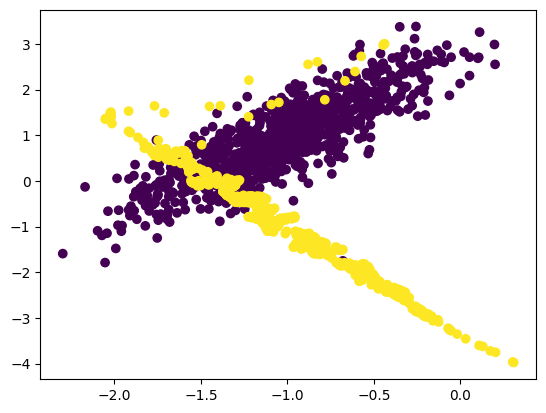

In [97]:
plt.scatter(oversample_pd['f1'], oversample_pd['f2'], c=oversample_pd['target'])

## You can see that the minority class samples are now more evenly distributed and mostt datapoints were created where more datapoints were present.

SMOTE is a powerful technique for handling imbalanced datasets, but it can also introduce noise and overfitting if not used carefully.

It's important to evaluate the performance of your model using appropriate metrics, such as precision, recall,and    F1-score, especially when dealing with imbalanced datasets.

In this notebook, we have covered the following:

 1. Handling missing values using mean, median, and mode

 2. Upsampling and downsampling techniques for imbalanced datasets

 3. SMOTE technique for generating synthetic samples for the minority class

 4. Visualizing the data using scatter plots

 5. Evaluating the performance of your model using appropriate metrics
 
 6. Importance of careful evaluation when dealing with imbalanced datasets


## 5 number summary and Box Plot

Minimun, Maximum, Median, Q1, Q3, IQR

In [5]:
import numpy as np
import random
# Create a list of random integers between 40 and 100
random.seed(10)
lst_marks = np.random.randint(40, 100, size=10, dtype=int)
lst_marks


array([59, 76, 75, 85, 88, 78, 86, 43, 40, 61], dtype=int32)

In [9]:
minimum,Q1,median,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1])

In [16]:
minimum,Q1,median,Q3,maximum
# IQR = Q3 - Q1
# IQR


(np.float64(40.0),
 np.float64(59.5),
 np.float64(75.5),
 np.float64(83.25),
 np.float64(88.0))

In [12]:
# To check the outliers
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

In [ ]:
lower_fence, upper_fence
# So any value below lower_fence or above upper_fence is an outlier

(np.float64(23.875), np.float64(118.875))

<Axes: >

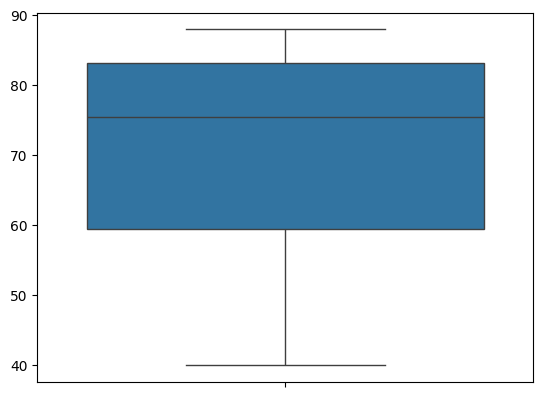

In [ ]:
# To check the outliers
sns.boxplot(data=lst_marks, orient='v') # This will show the outliers in the boxplot
# A boxplot shows the distribution of the data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
# The line inside the box represents the median, and the lines extending from the box (whiskers) represent the range of the data. Any points outside the whiskers are considered outliers.


<Axes: >

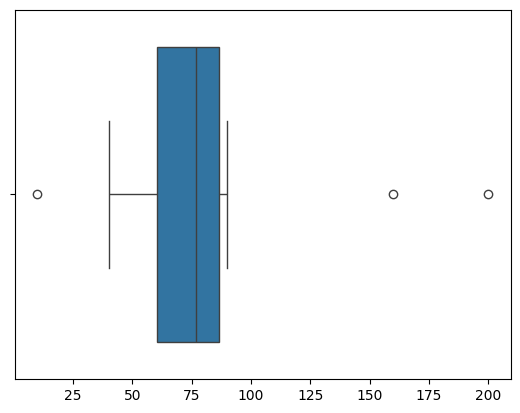

In [ ]:
# Lets do this using outliers
lst_marks = np.array([200,59, 76, 75, 85, 88, 78, 86, 43, 40, 61,160, 70, 80, 90, 10])
# To check the outliers
sns.boxplot(data=lst_marks,orient='h', legend='auto')


## DATA ENCODING

1-Nominal/OHE(One Hot Encoding) Encoding


💡 Why it's called Nominal Encoding?

Because it's used for nominal (a.k.a. categorical) data—things that are names or labels without any order (like colors, cities, brands, etc.).

example--let the categories be Red, Blue, Green. Machines (like machine learning models) don't understand words—they understand numbers. But if you just assign numbers like:

Red = 1, Blue = 2, Green = 3

The machine might think Green (3) is somehow more than Blue (2), which isn't true—colors are just different, not ranked.

One-hot encoding fixes this by turning each category into its own column like this:

Color_Red	Color_Blue	Color_Green
1	             0	        0
0	             1	        0
0	             0	        1


✅ Pros of One-Hot Encoding--

1.) No Assumed Order-
    It treats categories as equal and independent, which is perfect for nominal data (like color, city, etc.).

2.) Model-Friendly-
    Most machine learning models (like linear regression, decision trees, etc.) work well with OHE because it turns text into a clean numeric format.

3.) Prevents Misinterpretation-
    It avoids the risk of models wrongly thinking one category is bigger or smaller than another (like what might happen with label encoding).

4.) Works Well for Few Categories-
    If your categorical feature has just a few unique values, OHE works beautifully.




❌ Cons of One-Hot Encoding

1.) Curse of Dimensionality
    If a feature has many categories (like country names or zip codes), OHE creates tons of new columns, which can slow down training and use a lot of memory.

2.) Sparse Data
    It creates mostly 0s in the resulting matrix (sparse matrix), which isn’t efficient unless your tools handle sparse data well.

3.) Overfitting Risk
    When the number of categories is high, models can overfit to the noise in each unique category.

4.) Column Explosion in Multiple Features
    If several categorical features are OHE’d, the number of total columns can blow up fast, making the dataset harder to manage.




In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Create a DataFrame with categorical data
df = pd.DataFrame({'color':['red', 'blue', 'green', 'blue', 'red']})
df

,color
0,red
1,blue
2,green
3,blue
4,red


In [29]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder() 

In [31]:
encoded = encoder.fit_transform(df[['color']]).toarray() # This will create a sparse matrix of the one-hot encoded values

In [32]:
# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['color'])) # This will create a DataFrame with the one-hot encoded values
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [33]:
# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1) # This will concatenate the original DataFrame with the one-hot encoded DataFrame
df

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,blue,1.0,0.0,0.0
4,red,0.0,0.0,1.0


In [39]:
# For new data, we can use the same encoder to transform the new data
new_data = pd.DataFrame({'color':['red', 'green']})
new_data
encoded_new = encoder.transform(new_data[['color']]).toarray() # This will create a sparse matrix of the one-hot encoded values for new data
encoded_new_df = pd.DataFrame(encoded_new, columns=encoder.get_feature_names_out(['color'])) # This will create a DataFrame with the one-hot encoded values for new data
encoded_new_df, encoded_new
encoder.transform([['red']]).toarray() # This will create a sparse matrix of the one-hot encoded values for new data

c:\Users\pc\PycharmProjects\PythonProject\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])

In [ ]:
# Lets do an example with tips dataset
import seaborn as sns
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [42]:
# To check the unique values in the dataset
encoded = encoder.fit_transform(data[['sex', 'smoker', 'day']]).toarray() # This will create a sparse matrix of the one-hot encoded values
encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]], shape=(244, 8))

In [44]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoded_df.head(10)

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


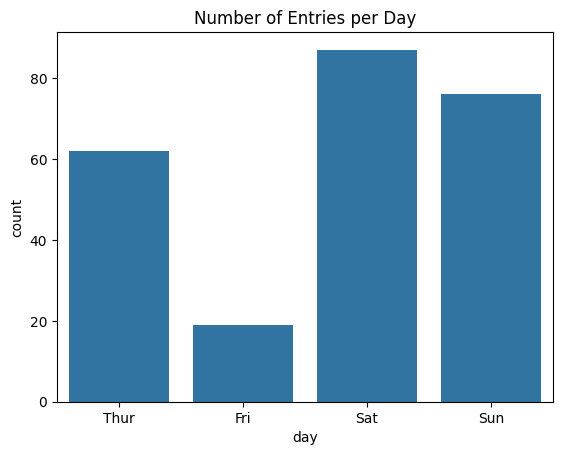

In [49]:
import matplotlib.pyplot as plt

# Plot count of entries per day (original data is better for this)
sns.countplot(x='day', data=data)
plt.title("Number of Entries per Day")
plt.show()


## 2-Label Encoding?

Label encoding converts categorical text data into numbers by assigning a unique number to each category.

✅ Pros of Label Encoding:

Very Simple & Fast-

    Just one line of code, and memory-efficient.



No New Columns-

    Unlike One-Hot Encoding, it doesn’t create extra columns, which is great when dealing with high-cardinality data.



Works Well with Tree-Based Models-

    Algorithms like Decision Trees, Random Forests, and XGBoost don’t assume numerical order, so label encoding works fine.



❌ Cons of Label Encoding:

Implied Ordinal Relationship-

    Assigning numbers introduces an artificial order (like Red=0, Blue=1, Green=2), which some models (like Linear Regression, Logistic Regression) may misinterpret as "Green > Blue > Red".



Can Mislead Distance-Based Models-

    Models like KNN or SVM may treat label differences as meaningful distances, which is wrong for unordered categories.



Harder to Interpret-

    Numbers don't tell you what the original category was unless you map them back.

In [54]:
# Create a DataFrame with categorical data
df = pd.DataFrame({'color':['red', 'blue', 'green', 'blue', 'red']})


In [55]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder() 
# Fit and transform the data
df['color_encoded'] = le.fit_transform(df['color']) # This will create a new column with the encoded values
# df

## Ordinal Encoding

Ordinal Encoding assigns integers to categories that have a natural rank or order.

✅ Pros of Ordinal Encoding:

Captures Order-

    Perfect for features with a natural order (e.g., size, rating, education level).

Efficient-

    Compact—only one new column. No explosion of dimensions like One-Hot.

Works with Most Models-

    Especially useful in models where order matters (e.g., tree-based, linear).

❌ Cons of Ordinal Encoding:

Dangerous If Misused-

    If there's no real order (like cities or product names), using ordinal encoding may mislead models.

Assumes Equal Spacing-

    Some models assume the jump from 0→1 is equal to 1→2, which might not be true in reality (e.g., 'Small' to 'Medium' vs 'Medium' to 'Large').

Harder with Non-Ordinal Data-

    You'll have to define an artificial order, which may not reflect the truth.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})


In [65]:
# Create an instance of OrdinalEncoder
# Ensure the categories in the OrdinalEncoder match the case of the values in the 'Size' column
oe = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])  # Update categories to match the case

# Fit and transform the data
df['size_encoded'] = oe.fit_transform(df[['Size']])
df

,Size,size_encoded
0,Small,0.0
1,Medium,1.0
2,Large,2.0
3,Medium,1.0
4,Small,0.0


In [69]:
# for new data, we can use the same encoder to transform the new data
oe.transform([['Small']]) # This will create a sparse matrix of the one-hot encoded values for new data

c:\Users\pc\PycharmProjects\PythonProject\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

## 3- Target Guided Ordinal Encoding

Target Guided Ordinal Encoding assigns ranks to categories based on their relationship with the target variable.

Instead of using arbitrary or manual order (like “Small < Medium < Large”), it uses the mean (or median) of the target for each category to define the order.

✅ Pros of Target Guided Ordinal Encoding:

Uses Target Info-

    It captures the relationship between categorical features and the output—smarter than plain label/ordinal encoding.

Reduces Noise-

    It simplifies high-cardinality features without creating a bunch of columns.

Efficient for Tree Models-

    Trees benefit from these numeric splits along value thresholds.

❌ Cons:

Data Leakage Risk! 🚨-

    If you compute the mean using all data (including test/validation), it leaks info from the target — so always compute using train set only.

Not Useful for Classification without Clear Trends-

    If categories don't have a clear impact on the target, it might add noise.

Model-Dependent-

    It works best when the model can handle ordered numerical inputs, e.g., trees or linear models with careful regularization.

📌 Best Practices:

    Always compute the mapping using only the training set.

    For classification, use the mean of the probability or target class ratio.

    For regression, use the mean/median of the target for each category.

    For categories not seen during training (in test), handle with a default value (e.g., -1 or mean rank).

In [75]:
df = pd.DataFrame({
    'city': ['Delhi', 'Mumbai', 'Chennai', 'Delhi', 'Mumbai', 'Chennai', 'Delhi', 'Mumbai', 'Chennai'],
    'cost': [300, 500, 200, 350, 450, 250, 400, 550, 300]
})
mean_price = df.groupby('city')['cost'].mean().to_dict() # This will group the data by city and calculate the mean cost for each city
mean_price

{'Chennai': 250.0, 'Delhi': 350.0, 'Mumbai': 500.0}

In [ ]:
# To use target guided ordinal encoding, we will replace the city names with the mean cost of each city
df['city_encoded'] = df['city'].map(mean_price) # This will create a new column with the encoded values
df
# Using this i can give my model only cost and city_encoded column to train.
# This will help the model to learn the relationship between city and cost and make predictions based on that relationship.

,city,cost,city_encoded
0,Delhi,300,350.0
1,Mumbai,500,500.0
2,Chennai,200,250.0
3,Delhi,350,350.0
4,Mumbai,450,500.0
5,Chennai,250,250.0
6,Delhi,400,350.0
7,Mumbai,550,500.0
8,Chennai,300,250.0
